In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys 
sys.path.append('../utils')
import plot_utils

# Load Data

In [2]:
data_path = "../../data/shap/"

In [3]:
bert_shap_df = pd.read_csv(data_path + "bert_test_shap-values.csv")
bert_shap_df

,text_id,token,shap_neg,shap_neut,shap_pos
0,0,[CLS],0.000000,0.000000,0.000000
1,0,17,-0.007158,0.012147,-0.004989
2,0,war,0.009573,-0.021759,0.012187
3,0,en,-0.001289,0.006610,-0.005321
4,0,w,0.002141,-0.001326,-0.000815
...,...,...,...,...,...
26729,441,beg,0.008301,-0.016289,0.007988
26730,441,eg,0.007680,-0.014102,0.006422
26731,441,nen,0.013180,-0.031078,0.017898
26732,441,.,0.000038,-0.006390,0.006353


In [4]:
gbert_shap_df = pd.read_csv(data_path + "gbert_test_shap-values.csv")
gbert_shap_df

,text_id,token,shap_neg,shap_neut,shap_pos
0,0,[CLS],0.000000,0.000000,0.000000
1,0,17,-0.005422,0.018636,-0.013214
2,0,waren,-0.005749,0.017784,-0.012035
3,0,wir,-0.002026,0.001944,0.000081
4,0,in,-0.003754,0.010308,-0.006554
...,...,...,...,...,...
16418,441,Liebe,-0.020607,-0.363338,0.383945
16419,441,zu,0.004014,-0.026877,0.022863
16420,441,begegnen,-0.007661,-0.043362,0.051023
16421,441,.,0.000910,-0.046911,0.046001


# Merge and Reformat

In [5]:
combined_shap_df = gbert_shap_df[["shap_neg", "shap_neut", "shap_pos"]].copy()
combined_shap_df["model"] = "gbert*"

x = bert_shap_df[["shap_neg", "shap_neut", "shap_pos"]].copy()
x["model"] = "bert*"
combined_shap_df = pd.concat([combined_shap_df, x])
combined_shap_df

,shap_neg,shap_neut,shap_pos,model
0,0.000000,0.000000,0.000000,gbert*
1,-0.005422,0.018636,-0.013214,gbert*
2,-0.005749,0.017784,-0.012035,gbert*
3,-0.002026,0.001944,0.000081,gbert*
4,-0.003754,0.010308,-0.006554,gbert*
...,...,...,...,...
26729,0.008301,-0.016289,0.007988,bert*
26730,0.007680,-0.014102,0.006422,bert*
26731,0.013180,-0.031078,0.017898,bert*
26732,0.000038,-0.006390,0.006353,bert*


# Melt and Plot

In [6]:
melted_combined_shap_df = combined_shap_df.melt("model", var_name="label", value_name="shap_value")
melted_combined_shap_df["label"] = melted_combined_shap_df["label"].str.replace("shap_neg", "negative")
melted_combined_shap_df["label"] = melted_combined_shap_df["label"].str.replace("shap_neut", "neutral")
melted_combined_shap_df["label"] = melted_combined_shap_df["label"].str.replace("shap_pos", "positive")
melted_combined_shap_df

,model,label,shap_value
0,gbert*,negative,0.000000
1,gbert*,negative,-0.005422
2,gbert*,negative,-0.005749
3,gbert*,negative,-0.002026
4,gbert*,negative,-0.003754
...,...,...,...
129466,bert*,positive,0.007988
129467,bert*,positive,0.006422
129468,bert*,positive,0.017898
129469,bert*,positive,0.006353


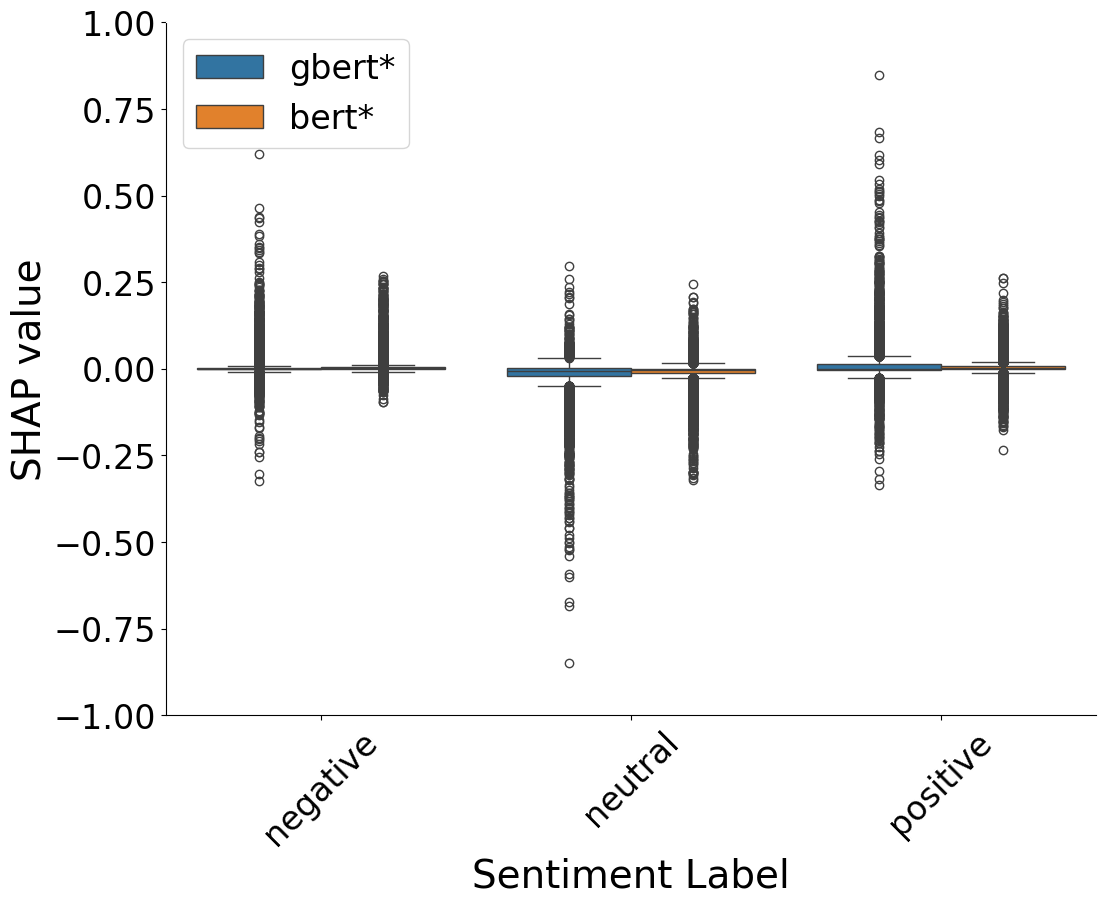

In [7]:
fig = plt.figure(figsize=(12,9))

ax = sns.boxplot(melted_combined_shap_df, x="label", y="shap_value", hue="model")

plot_utils.format_boxplot(ax, "Sentiment Label", "SHAP value");